# A Study of Biodiversity in Four National Parks
**Vince Gregoric**  
**Feb. 16, 2023**

## Overview and Project Goals

The analysis in this Jupyter notebook was completed as the final project of the Data Science Foundations Skill Path on Codecademy.com. This was an open-ended project with the overall goal of practicing data cleanup, analysis, and visualization. Codecademy.com provided the data, but it was up to me to determine the direction of the project.

The data for this project comes from two .csv files. The first file, "species_info.csv," contains information about many species of plants and animals found in four US national parks. This includes the scientific name, common names, species category, and conservation status for each species. The second file, "observations.csv," records the number of times each species was observed in each of the four national parks over the course of one week.

The goals I set for this project were to:   
- Explore the variety of species found in national parks in the US, looking for any interesting relationships between species categories, conservation statuses, etc.
- Determine what factors affect how often a species is observed in the wild
- Evaluate the accuracy of the conservation status assignments

The overall structure of this file is as follows. First, we will load the data and take a preliminary look. Next, we will clean up the data by filling in missing values and removing duplicate information. Once the data is cleaned, we will perform a descriptive analysis, including calculating summary statistics and looking at how the data is distributed across the categorical variables. Next, we will dive deeper into the data with some exploratory analysis, and visualize our results graphically. Finally, we will summarize the main findings of the project and discuss potential ways to extend our analysis.

# 

### Loading and Examining the Data:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from pandas.api.types import CategoricalDtype

# Set global style settings for graphs
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"}) 
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

# Load the data
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [2]:
# Examine 'species_info' DataFrame:
print(species_info.info())
print('\nNull count:\n')
print(species_info.isna().sum())
print('\nNumber of unique values:\n')
print(species_info.nunique())
print('\nUnique conservation_status values:\n')
print(species_info.conservation_status.unique())

species_info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None

Null count:

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

Number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

Unique conservation_status values:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
# Examine 'observations' DataFrame
print(observations.info())
print('\nNull count:\n')
print(observations.isna().sum())
print('\nNumber of unique values:\n')
print(observations.nunique())
print('\nUnique park_name values:\n')
print(observations.park_name.unique())
observations.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None

Null count:

scientific_name    0
park_name          0
observations       0
dtype: int64

Number of unique values:

scientific_name    5541
park_name             4
observations        304
dtype: int64

Unique park_name values:

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


# 

### Dealing with Missing Values:

The only missing values are found in the "conservation_status" column of the "species_info" DataFrame. After checking the conservation status for a handful of species with missing values, it seems that the values are missing for species with "Least Concern" status. The code below replaces the missing values with "Least Concern". See https://en.wikipedia.org/wiki/Conservation_status for an explanation of the different conservation statuses. 

In [4]:
# Replace NaN values in species_info.conservation_status with 'Least Concern'
species_info.fillna(value='Least Concern', inplace=True)
# Confirm that the replacement worked
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Least Concern
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


# 

### Dealing with Duplicate Values

Of the 5824 rows in the "species_info" DataFrame, there are only 5541 unique scientific names and 5504 unique common names. In the analysis below, we will ignore the common names, and use the scientific names as a unique marker for each species. In order for this to work, the duplicate scientific names must be dropped. Before we remove the duplicate values, we need to make sure that rows with the same scientific name really refer to the same species. So, we will only drop rows that have identical values for the "scientific_name," "conservation_status," and "category" columns (we can ignore the "common_names" column). After dropping these duplicate rows, we need to check to see if there are any rows where the scientific name is the same but other columns are different.

In [5]:
# Drop cases where the scientific_name, conservation_status, and category is the same 
species_info.drop_duplicates(subset=['scientific_name', 'conservation_status', 'category'], inplace=True)

# Find cases where the scientific_name is the same but the conservation_status or category is different
# (these rows will not have been dropped by the statement above)
different_conservation_status = species_info[species_info.duplicated(subset='scientific_name',keep=False)]
display(different_conservation_status)

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,Least Concern
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


# 

### Dealing with Conflicting Conservation Statuses:

In the code above, we found that there are two species that are listed in multiple rows because they have two different conservation status values. Canis lupis (the gray wolf) is listed as both "Endangered" and "In Recovery," while oncorhynchus mykiss (the rainbow trout) is listed as both "Least Concern" and "Threatened." We need to do a little research to determine which conservation status is appropriate.

For the gray wolf, Wikipedia lists it as "Least Concern" on the IUCN Red List of Threatened Species. It seems that gray wolf populations were in more danger in the past, but populations have been making a comeback after the Endangered Species Act of 1973. So, we will keep the row listing the wolf as "In Recovery" and remove the row listing it as "Endangered." See https://en.wikipedia.org/wiki/Wolf#Status_and_conservation for more information on the gray wolf's conservation status.

For the rainbow trout, Wikipedia lists it as "Secure" on the NatureServe conservation status system. But it seems that there are some federal/state agencies that classify the rainbow trout as endangered or threatened. To be on the cautious side, let's keep the row listing the rainbow trout as "Threatened", and remove the row listing it as "Least Concern." See https://en.wikipedia.org/wiki/Rainbow_trout#Conservation for more information on the rainbow trout's conservation status.

The code below drops the row listing the gray wolf as "Endangered" and the row listing the rainbow trout as "Least Concern."

In [6]:
# Remove the row listing the gray wolf as 'Endangered':
species_info.drop(index=8, inplace=True)

# Remove the row listing the rainbow trout as 'Least Concern':
species_info.drop(index=560, inplace=True)

# Test to see whether there are any duplicate scientific_name values remaining in the 'species_info' DataFrame:
print("Duplicate scientific names remaining:")
display(species_info[species_info.duplicated(subset='scientific_name',keep=False)])
print('\n')

# Create a DataFrame to hold the scientific name, category, and conservation status of every unique species.
unique_species = pd.DataFrame()
unique_species['scientific_name'] = species_info.scientific_name
unique_species['category'] = species_info.category
unique_species['conservation_status'] = species_info.conservation_status

Duplicate scientific names remaining:


,category,scientific_name,common_names,conservation_status


The code below merges the "species_info" and "observations" DataFrames into a single, master DataFrame named "df." This will allow us to look at the relationships between all variables present in the data.

In [7]:
# Left join species_info and observations:
df = pd.merge(observations, species_info, how='left')
display(df)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least Concern
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Least Concern
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Least Concern
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Least Concern
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Least Concern


# 

### Dealing with Duplicate Observation Values:

From the output above, note that there are 23296 rows in the master DataFrame ("df"). Since there are 5541 unique species and 4 parks, there should only be 5541 x 4 = 22164 rows, assuming every species was observed at every park. Since we have more than 22164 rows, some species must be listed more than once per park. The code below counts the number of rows for each species, and stores it in the DataFrame "num_rows_per_species."

In [8]:
# Find the number of rows for each species
num_rows_per_species = df.groupby('scientific_name').park_name.count().reset_index(name='Count').sort_values('Count', ascending=False)
display(num_rows_per_species)
print('\nThe unique values for the "Count" column above are:', num_rows_per_species.Count.unique())

,scientific_name,Count
804,Canis lupus,12
2452,Holcus lanatus,12
4179,Puma concolor,12
3322,Myotis lucifugus,12
1103,Castor canadensis,12
...,...,...
1891,Equisetum laevigatum,4
1889,Equisetum hyemale ssp. affine,4
1888,Equisetum fluviatile,4
1884,Epipactis gigantea,4



The unique values for the "Count" column above are: [12  8  4]


# 

Each species should be listed exactly 4 times (once for each park). From the code above, it looks like there are some species which are listed 8 times or 12 times. The code below counts the number of species listed 4, 8, and 12 times, and prints out the rows for one species that is listed 12 times so we can see why there are more than 4 rows.

In [9]:
four_rows = num_rows_per_species[num_rows_per_species.Count == 4]
eight_rows = num_rows_per_species[num_rows_per_species.Count == 8]
twelve_rows = num_rows_per_species[num_rows_per_species.Count == 12]
print("There are", len(twelve_rows), "species with twelve rows,")
print(len(eight_rows), "species with eight rows,")
print("and", len(four_rows), "species with four rows.")
print("There are", len(unique_species), "total species.")

display(df[df.scientific_name == 'Myotis lucifugus'].sort_values('park_name'))

There are 9 species with twelve rows,
265 species with eight rows,
and 5267 species with four rows.
There are 5541 total species.


,scientific_name,park_name,observations,category,common_names,conservation_status
9318,Myotis lucifugus,Bryce National Park,103,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
10759,Myotis lucifugus,Bryce National Park,108,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
15865,Myotis lucifugus,Bryce National Park,87,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
1603,Myotis lucifugus,Great Smoky Mountains National Park,57,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
8308,Myotis lucifugus,Great Smoky Mountains National Park,59,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
11395,Myotis lucifugus,Great Smoky Mountains National Park,58,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7094,Myotis lucifugus,Yellowstone National Park,239,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
12562,Myotis lucifugus,Yellowstone National Park,233,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
16384,Myotis lucifugus,Yellowstone National Park,207,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
9738,Myotis lucifugus,Yosemite National Park,124,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern


So, it looks like the species that are listed 12 times have 3 different values for the "observations" column in each park (and the species listed 8 times probably have 2 different "observations" values per park). The "observations" column is an integer giving the number of times a species was observed in a given park over a week. It is unclear why some species have different observation values for the same park, but we should remove the extra rows so that we don't over count the observations for these species. Looking at the observations for myotis lucifugus above, it seems like the observations values for a given species in a given park don't vary too much, so let's just replace these repeated rows with a single row containing the average observation value.

In [10]:
# Remove rows where the scientific name and park are the same, 
# and replace with the average observations for that species in that park:
df = df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 
                   'conservation_status']).mean().astype(int).reset_index()

# Test previous code by printing out rows for myotis lucifugus:
display(df[df.scientific_name == 'Myotis lucifugus'])

# Confirm that all species are now only listed 4 times (once per park)
num_rows_per_species = df.groupby('scientific_name').park_name.count().reset_index(name='Count').sort_values('Count', ascending=False)
four_rows = num_rows_per_species[num_rows_per_species.Count == 4]
eight_rows = num_rows_per_species[num_rows_per_species.Count == 8]
twelve_rows = num_rows_per_species[num_rows_per_species.Count == 12]
print("There are", len(twelve_rows), "species with twelve rows,")
print(len(eight_rows), "species with eight rows,")
print("and", len(four_rows), "species with four rows.")
print("There are", len(unique_species), "total species.")

,scientific_name,park_name,category,common_names,conservation_status,observations
13288,Myotis lucifugus,Bryce National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,99
13289,Myotis lucifugus,Great Smoky Mountains National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,58
13290,Myotis lucifugus,Yellowstone National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,226
13291,Myotis lucifugus,Yosemite National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,132


There are 0 species with twelve rows,
0 species with eight rows,
and 5541 species with four rows.
There are 5541 total species.


# 

When analyzing the data and creating graphs, it will be useful to define an order for the species category, conservation status, and park columns. That way, all graphs will be in the same order, and we can display data for conservation status in order of increasing concern. The code below recasts these columns as an ordered CategoricalDtype so we can create this custom order. For the ordering of endangered vs threatened, see https://www.usgs.gov/faqs/what-are-differences-between-endangered-threatened-imperiled-and-risk-species

In [11]:
# Recast category, conservation_status, and park_name as ordered CategoricalDtype so we can use a custom order
category_order = CategoricalDtype(['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish'], ordered=True)
conservation_order = CategoricalDtype(['Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'], ordered=True)
park_order = CategoricalDtype(['Great Smoky Mountains National Park','Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park'], ordered=True)

# Recast column dtypes for df
df.category = df.category.astype(category_order)
df.conservation_status = df.conservation_status.astype(conservation_order)
df.park_name = df.park_name.astype(park_order)

# Recast column dtypes for unique_species
unique_species.category = unique_species.category.astype(category_order)
unique_species.conservation_status = unique_species.conservation_status.astype(conservation_order)

## 
## 


## Descriptive Analysis:

Now that we have cleaned up the data, we should look at some basic statistics to get a better feel for the data. For example, we can find out how the species are distributed across the different categories and conservation statuses. We can also look at how the observations are distributed across parks, categories, and conservation statuses.

In [12]:
# Start with a basic df.describe statement to examine the data in df 
display(df.describe(include='all'))

# Calculate the total number of species:
num_species = len(unique_species)
print('There are', num_species, 'species represented in this dataset.')

# Calculate total number of observations:
num_observations = df.observations.sum()
print('There were', num_observations, 'total observations across all species and all parks.')

,scientific_name,park_name,category,common_names,conservation_status,observations
count,22164,22164,22164,22164,22164,22164.000000
unique,5541,4,7,5229,5,NaN
top,Abies bifolia,Great Smoky Mountains National Park,Vascular Plant,Brachythecium Moss,Least Concern,NaN
freq,4,5541,17048,28,21448,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.302427
std,NaN,NaN,NaN,NaN,NaN,69.806123
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


There are 5541 species represented in this dataset.
There were 3153991 total observations across all species and all parks.


# 

From the df.describe output above, we can see that the most common species category is Vascular Plant, and the most common conservation status is Least Concern. Another important thing to note is that the minimum observations for a species is 9, which confirms that all species were observed at least once in each park. 

Now, let's dig a little deeper, and look at how the species and observations were distributed across species categories. The table below contains the following columns:
- **category:** the species category (mammal, reptile, etc.)
- **species_count:** the number of species in the given category
- **species_percent:** the percent of the total species in the given category
- **observations_count:** the total number of observations for all species in this category across all parks
- **observations_percent:** the percent of observations accounted for by the species in this category out of the total number of observations
- **avg_obs_per_species:** the mean number of observations (sum of observations in all 4 parks) per species for this category
- **std_dev_of_mean:** the standard deviation of the mean observations for this category, calculated as the standard deviation of the set of observations, divided by the square root of the number of species in this category (see https://en.wikipedia.org/wiki/Standard_error#Standard_error_of_the_mean)

In [13]:
print('Breakdown by category:')
# Calculate the number of species in each category:
category_breakdown = unique_species.groupby('category').scientific_name.count().reset_index(name='species_count').sort_values('category')
# Calculate the percent of species in each category (out of the total number of species):
category_breakdown['species_percent'] = category_breakdown.apply(lambda row: round(100 * row.species_count / num_species, 2), axis=1)
# Calculate the total number of observations for each category
category_observations = df.groupby('category').observations.sum().reset_index(name='total_observations').sort_values('category')
category_breakdown['observations_count'] = category_observations['total_observations']
# Calculate the percent of observations in each category (out of the total number of observations)
category_breakdown['observations_percent'] = category_breakdown.apply(lambda row: round(100 * row.observations_count / num_observations, 2), axis=1)
# Calculate the average number of observations per species for each category
category_breakdown['avg_obs_per_species'] = category_breakdown.apply(lambda row: round(row.observations_count / row.species_count, 1), axis=1)
# Find the standard deviation of previous result:
category_stdev = df.groupby('category').observations.std().reset_index(name='std_dev').sort_values('category')
category_stdev['num_species'] = category_breakdown.species_count
category_stdev['std_dev'] = category_stdev.apply(lambda row: row.std_dev / row.num_species ** 0.5, axis=1)
category_breakdown['std_dev_of_mean'] = category_stdev['std_dev']
display(category_breakdown)

Breakdown by category:


,category,species_count,species_percent,observations_count,observations_percent,avg_obs_per_species,std_dev_of_mean
0,Vascular Plant,4262,76.92,2435940,77.23,571.5,1.068191
1,Nonvascular Plant,333,6.01,190653,6.04,572.5,3.826989
2,Mammal,176,3.18,95916,3.04,545.0,5.306645
3,Bird,488,8.81,274181,8.69,561.8,3.148185
4,Reptile,78,1.41,44105,1.40,565.4,7.893836
5,Amphibian,79,1.43,43421,1.38,549.6,8.039276
6,Fish,125,2.26,69775,2.21,558.2,6.349323


# 

From the table above, we can see that Vascular Plants make up 76.92% of the total species, and account for 77.23% of the total observations. The other species categories also have similar values for the percent of species and the percent of observations. Finally, the average observations per species is fairly consistent across all species categories. 

Now, let's repeat the previous analysis across conservations statuses instead of categories:

In [14]:
print('Breakdown by conservation status:')
# Calculate the number of species in each conservation status:
conservation_breakdown = unique_species.groupby('conservation_status').scientific_name.count().reset_index(name='species_count').sort_values('conservation_status')
# Calculate the percent of species in each conservation status (out of the total number of species):
conservation_breakdown['species_percent'] = conservation_breakdown.apply(lambda row: round(100 * row.species_count / num_species, 2), axis=1)
# Calculate the total number of observations for each conservation status
conservation_observations = df.groupby('conservation_status').observations.sum().reset_index(name='total_observations').sort_values('conservation_status')
conservation_breakdown['observations_count'] = conservation_observations['total_observations']
# Calculate the percent of observations in each conservation status (out of the total number of observations)
conservation_breakdown['observations_percent'] = conservation_breakdown.apply(lambda row: round(100 * row.observations_count / num_observations, 2), axis=1)
# Calculate the average number of observations per species for each conservation status
conservation_breakdown['avg_obs_per_species'] = conservation_breakdown.apply(lambda row: round(row.observations_count / row.species_count, 1), axis=1)
# Find the standard deviation of previous result:
conservation_stdev = df.groupby('conservation_status').observations.std().reset_index(name='std_dev').sort_values('conservation_status')
conservation_stdev['num_species'] = conservation_breakdown.species_count
conservation_stdev['std_dev'] = conservation_stdev.apply(lambda row: row.std_dev / row.num_species ** 0.5, axis=1)
conservation_breakdown['std_dev_of_mean'] = conservation_stdev['std_dev']
display(conservation_breakdown)

Breakdown by conservation status:


,conservation_status,species_count,species_percent,observations_count,observations_percent,avg_obs_per_species,std_dev_of_mean
0,Least Concern,5362,96.77,3069953,97.34,572.5,0.953544
1,Species of Concern,151,2.73,77394,2.45,512.5,5.080185
2,Threatened,10,0.18,2932,0.09,293.2,11.812032
3,Endangered,14,0.25,2083,0.07,148.8,4.782658
4,In Recovery,4,0.07,1629,0.05,407.2,26.568289


# 

Here, we can see that the Least Concern status accounts for 96.77% of all species in this dataset. Also, note that the average observations per species varies quite a bit across different conservation statuses, with fewer observations for species that are closer to extinction. 

Next, let's see how the observations are distributed across parks. The table below has the following columns:
- **park_name:** the name of the park
- **observations:** the total number of observations across all species in the given park
- **percent:** the percent of the total observations accounted for by the given park

In [15]:
print('Breakdown by park:')
# Calculate the total number of observations in each park:
park_observations = df.groupby('park_name').observations.sum().reset_index(name='observations')
# Calculate the percent of observations in each park:
park_observations['percent'] = park_observations.apply(lambda row: round(100 * row.observations / num_observations, 2), axis=1)
display(park_observations)

Breakdown by park:


,park_name,observations,percent
0,Great Smoky Mountains National Park,410825,13.03
1,Yosemite National Park,821472,26.05
2,Bryce National Park,548159,17.38
3,Yellowstone National Park,1373535,43.55


# 

From the previous table, it looks like the observations are split unevenly between parks, with Yellowstone having the most observations and Great Smoky Mountains having the least.

To wrap up our descriptive analysis, let's look at the percent of species under protection in each category. All conservation statuses except for "Least Concern" are considered under protection. The table below has the following columns:
- **category:** the species category (mammal, reptile, etc.)
- **species_count:** the number of species in the given category
- **protected_count:** the number of species under protected status in the given category
- **protected_percent:** the percent of species under protected status out of the total species for the given category

In [16]:
# Calculate the percent of protected species (all but 'Least Concern') in each species category:
print('Find the percent of protected species (all except "Least Concern") in each category:')
species_category_counts = unique_species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index(name='protected_count')
temp = species_category_counts[species_category_counts.conservation_status != 'Least Concern']
protected_species = pd.DataFrame()
protected_species['category'] = category_breakdown.category
protected_species['species_count'] = category_breakdown.species_count
protected_species['protected_count'] = temp.groupby('category').protected_count.sum().reset_index().protected_count
protected_species['protected_percent'] = protected_species.apply(lambda row: round(100 * (row.protected_count/row.species_count), 2), axis=1)
display(protected_species)

Find the percent of protected species (all except "Least Concern") in each category:


,category,species_count,protected_count,protected_percent
0,Vascular Plant,4262,46,1.08
1,Nonvascular Plant,333,5,1.50
2,Mammal,176,30,17.05
3,Bird,488,75,15.37
4,Reptile,78,5,6.41
5,Amphibian,79,7,8.86
6,Fish,125,11,8.80


In [17]:
# The code below produces smaller slices of the tables above, to highlight
# the most important insights gained during the descriptive analysis phase.

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Category"] = category_breakdown.category
temp_df["Number of Species"] = category_breakdown.species_count
temp_df["Percent"] = category_breakdown.species_percent
display(temp_df)

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Conservation Status"] = conservation_breakdown.conservation_status
temp_df["Number of Species"] = conservation_breakdown.species_count
temp_df["Percent"] = conservation_breakdown.species_percent
display(temp_df)

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Park"] = park_observations.park_name.apply(lambda x: x.replace("National Park", ""))
temp_df["Total Observations"] = park_observations.observations
temp_df["Percent"] = park_observations.percent
display(temp_df)

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Category"] = protected_species.category
temp_df["Percent of Species Protected"] = protected_species.protected_percent
display(temp_df)

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Category"] = category_breakdown.category
temp_df["Average Observations per Species"] = category_breakdown.avg_obs_per_species
display(temp_df)

print("\n\n\n\n")
temp_df = pd.DataFrame()
temp_df["Conservation Status"] = conservation_breakdown.conservation_status
temp_df["Average Observations per Species"] = conservation_breakdown.avg_obs_per_species
display(temp_df)

,Category,Number of Species,Percent
0,Vascular Plant,4262,76.92
1,Nonvascular Plant,333,6.01
2,Mammal,176,3.18
3,Bird,488,8.81
4,Reptile,78,1.41
5,Amphibian,79,1.43
6,Fish,125,2.26


,Conservation Status,Number of Species,Percent
0,Least Concern,5362,96.77
1,Species of Concern,151,2.73
2,Threatened,10,0.18
3,Endangered,14,0.25
4,In Recovery,4,0.07


,Park,Total Observations,Percent
0,Great Smoky Mountains,410825,13.03
1,Yosemite,821472,26.05
2,Bryce,548159,17.38
3,Yellowstone,1373535,43.55


,Category,Percent of Species Protected
0,Vascular Plant,1.08
1,Nonvascular Plant,1.50
2,Mammal,17.05
3,Bird,15.37
4,Reptile,6.41
5,Amphibian,8.86
6,Fish,8.80


,Category,Average Observations per Species
0,Vascular Plant,571.5
1,Nonvascular Plant,572.5
2,Mammal,545.0
3,Bird,561.8
4,Reptile,565.4
5,Amphibian,549.6
6,Fish,558.2


,Conservation Status,Average Observations per Species
0,Least Concern,572.5
1,Species of Concern,512.5
2,Threatened,293.2
3,Endangered,148.8
4,In Recovery,407.2


## 
## 

## Exploratory Analysis and Visualization

Now that we've gotten a better feel for the data with our descriptive analysis, let's dig in a little more and create visualizations of our results. 

### Species Distributions

The next two cells plot the distribution of species across categories and conservation statuses, respectively. Since the "Vascular Plant" category contains 77% of the species, it is hard to see the other categories on the initial plot. The second plot uses a broken y-axis to zoom in on the other categories, and the third plot omits the "Vascular Plant" category altogether. A similar issue occurs for the "Least Concern" conservation status, and the same three plots are used to visualize all the statuses clearly.

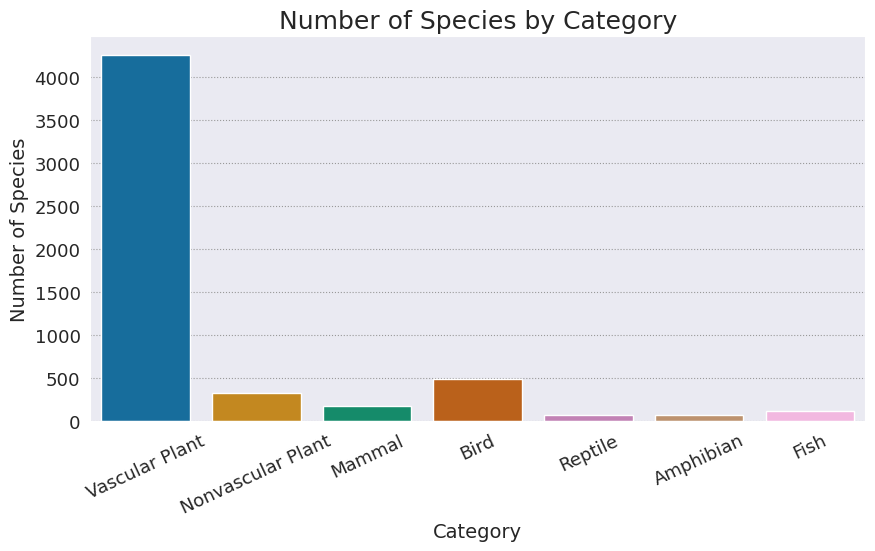

<Figure size 640x480 with 0 Axes>

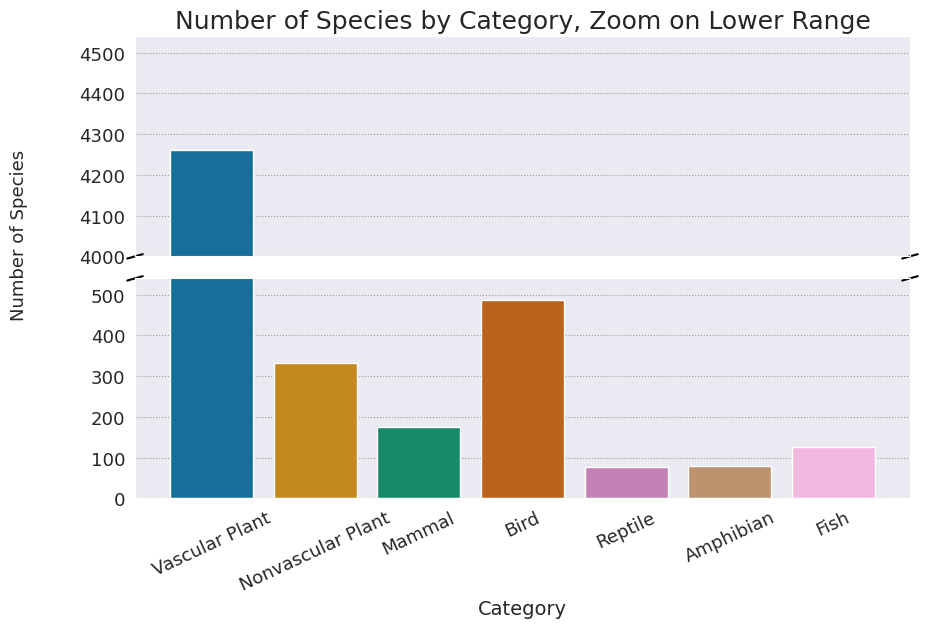

<Figure size 640x480 with 0 Axes>

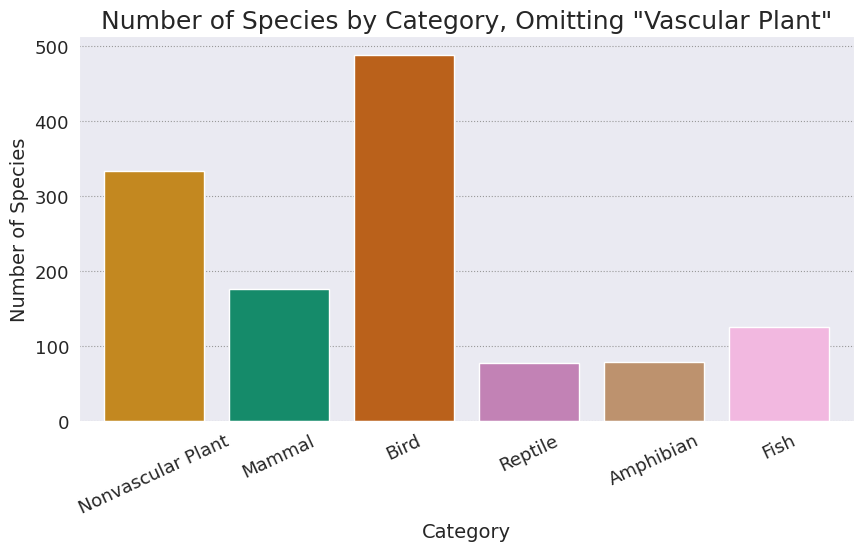

<Figure size 640x480 with 0 Axes>

In [18]:
pal = sns.color_palette('colorblind')

# Plot distribution of species over different categories
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='category', data=unique_species, palette=pal)
plt.title('Number of Species by Category');
plt.xlabel('Category');
plt.ylabel('Number of Species');
plt.xticks(rotation=25, fontsize=13);
plt.show()
plt.clf()

# Repeat previous plot, but use a broken y-axis to zoom in on lower region:
# Following example of broken axis graph at https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,6))
ax1 = sns.countplot(x='category', data=unique_species, palette=pal, ax=ax1)
ax2 = sns.countplot(x='category', data=unique_species, palette=pal, ax=ax2)
ax1.set_ylim(4000, 4540)
ax2.set_ylim(0, 540)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species by Category, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=25, fontsize=13)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()

# Repeat previous plot, but omit 'Vascular Plant' category
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='category', data=unique_species[-(unique_species.category == 'Vascular Plant')], palette=pal)
plt.title('Number of Species by Category, Omitting "Vascular Plant"')
ax.set_xlim(0.4,6.6)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=25, fontsize=13)
plt.show()
plt.clf()

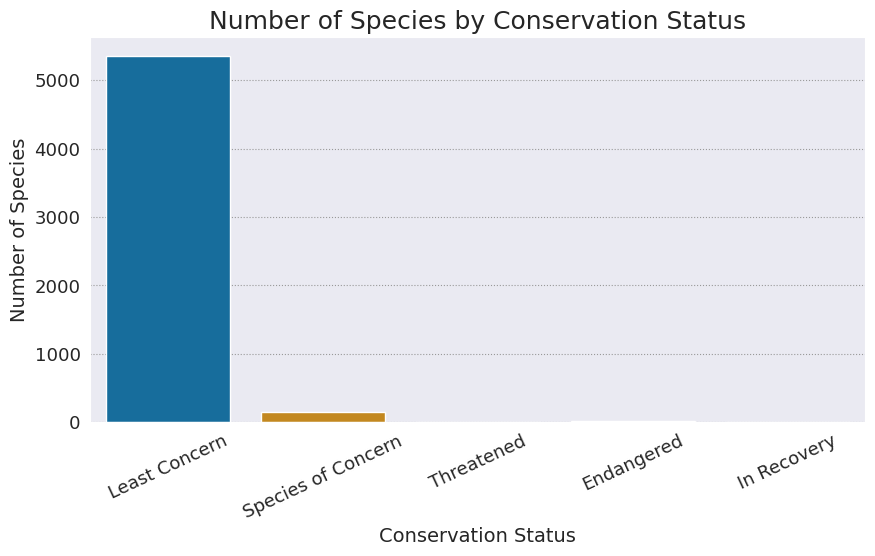

<Figure size 640x480 with 0 Axes>

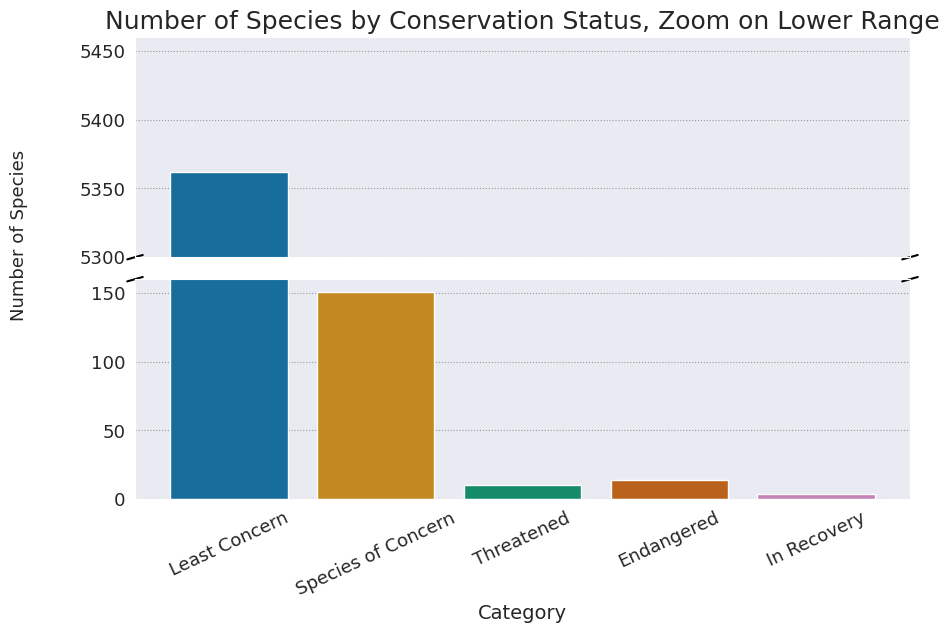

<Figure size 640x480 with 0 Axes>

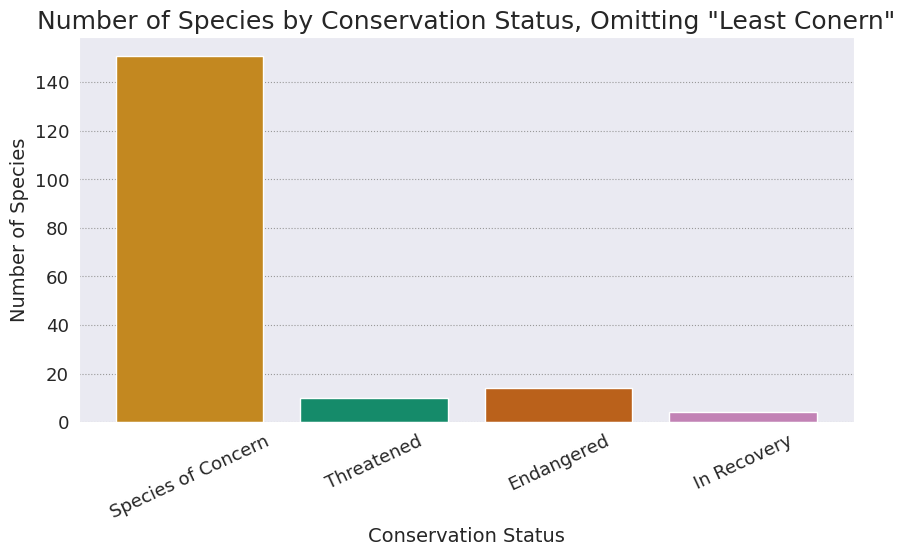

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot distribution of species over different conservation statuses
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='conservation_status', data=unique_species, palette=pal)
plt.title('Number of Species by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=25, fontsize=13)
plt.show()
plt.clf()


# Repeat previous plot, but use a broken y-axis to zoom in on lower region:
# Following example of broken axis graph at https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,6))
ax1 = sns.countplot(x='conservation_status', data=unique_species, palette=pal, ax=ax1)
ax2 = sns.countplot(x='conservation_status', data=unique_species, palette=pal, ax=ax2)
ax1.set_ylim(5300, 5460)
ax2.set_ylim(0, 160)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species by Conservation Status, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=25, fontsize=13)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()


# Repeat previous plot, but omit 'Least Concern' conservation status
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='conservation_status', data=unique_species[-(unique_species.conservation_status == 'Least Concern')], palette=pal)
plt.title('Number of Species by Conservation Status, Omitting "Least Conern"')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
ax.set_xlim(0.4,4.6)
plt.xticks(rotation=25, fontsize=13)
plt.show()
plt.clf()

# 

Now, let's look at how the species are distributed across species *and* conservation status at the same time. The next three cells produce arrays of graphs to explore this. The first cell produces graphs of the number of species in each category within a specific conservation status. The next cell reverses this, producing graphs of the number of species in each conservation status within a specific species category. For this set of graphs, the "Least Concern" bars dominate each graph. To allow the other conservation statuses to be seen clearly, the third set of graphs is a repeat of the second set but omitting the "Least Concern" status.

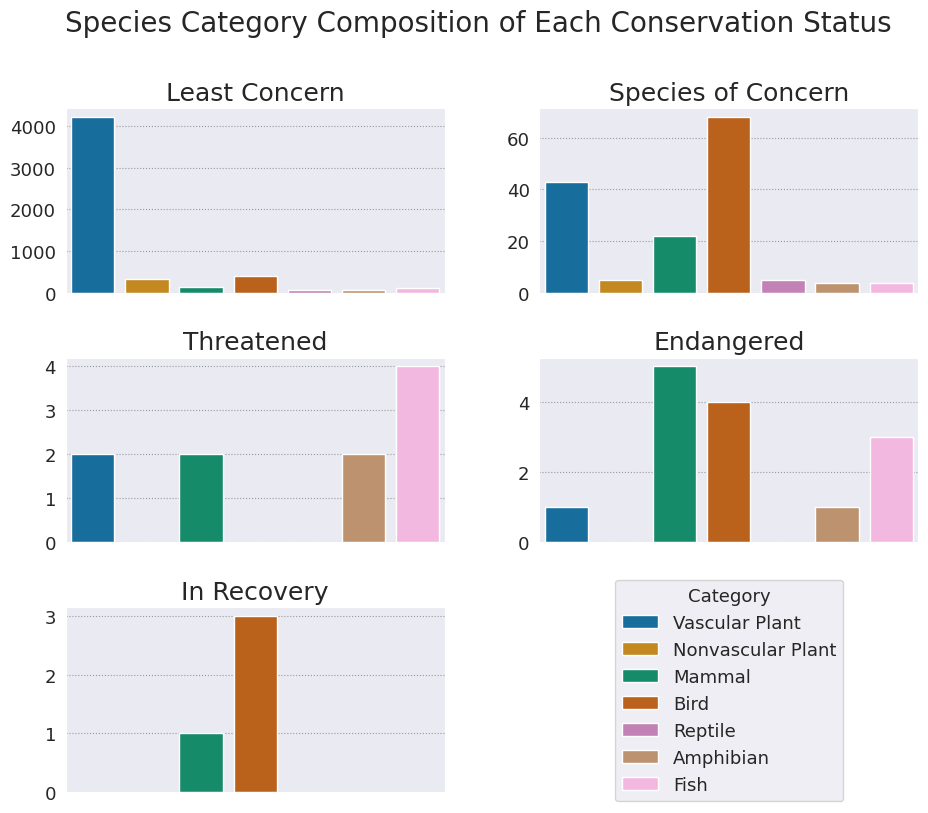

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot an array of bar graphs of number of species for each category, one graph for each conservation status
fig, axs = plt.subplots(3, 2, figsize=(11, 9))
fig.suptitle('Species Category Composition of Each Conservation Status', fontsize=20)

sns.countplot(ax=axs[0][0], x='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], palette=pal)
axs[0][0].set_title('Least Concern')
sns.countplot(ax=axs[0][1], x='category', data=unique_species[unique_species.conservation_status == 'Species of Concern'], palette=pal)
axs[0][1].set_title('Species of Concern')
sns.countplot(ax=axs[1][0], x='category', data=unique_species[unique_species.conservation_status == 'Threatened'], palette=pal)
axs[1][0].set_title('Threatened')
sns.countplot(ax=axs[1][1], x='category', data=unique_species[unique_species.conservation_status == 'Endangered'], palette=pal)
axs[1][1].set_title('Endangered')
sns.countplot(ax=axs[2][0], x='category', data=unique_species[unique_species.conservation_status == 'In Recovery'], palette=pal)
axs[2][0].set_title('In Recovery')

sns.countplot(ax=axs[2][1], x='category', dodge=False, hue='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], palette=pal)
axs[2][1].legend(loc=(0.2, -0.05), title="Category")
axs[2][1].set_axis_off()
axs[2][1].set_xlim(1000, 2000)

for i in range(3): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.25, hspace=0.35, top=0.87)
plt.show()
plt.clf()

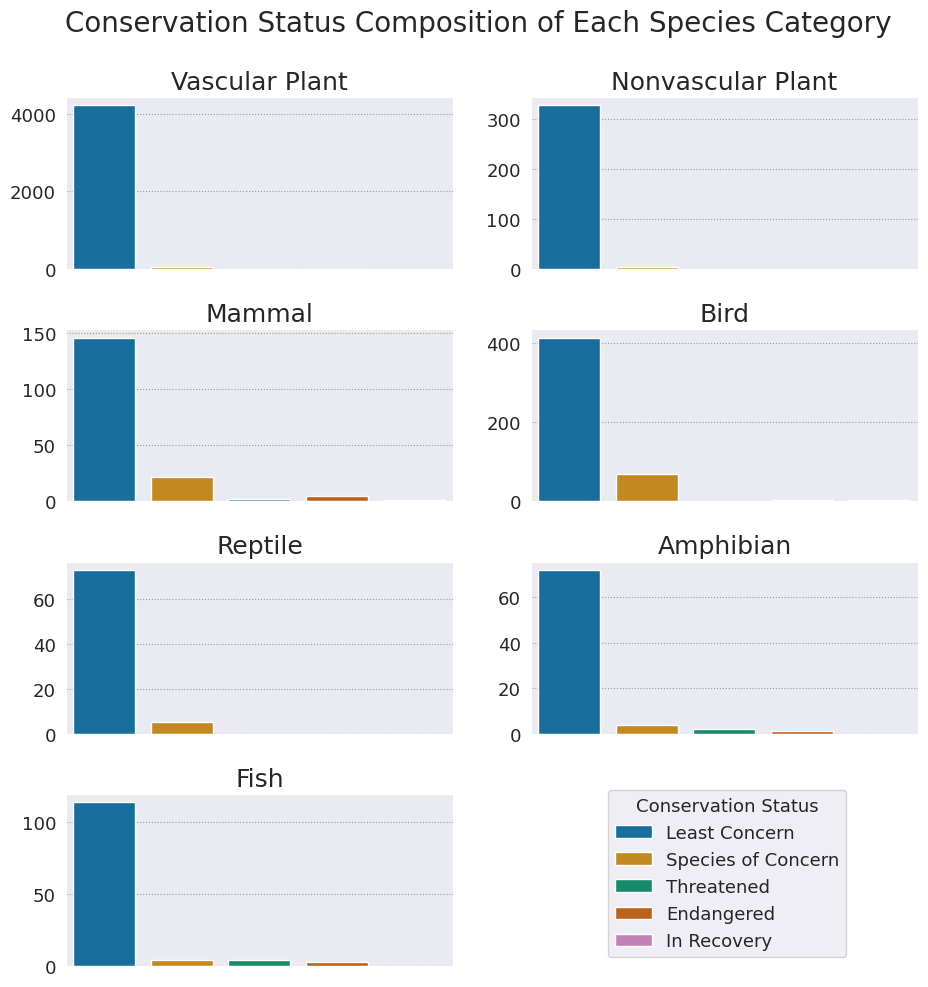

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot an array of bar graphs of number of species for each conservation status, one graph for each species category
fig, axs = plt.subplots(4, 2, figsize=(11, 11))
fig.suptitle('Conservation Status Composition of Each Species Category', fontsize=20)

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[unique_species.category == 'Vascular Plant'], palette=pal)
axs[0][0].set_title('Vascular Plant')
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[unique_species.category == 'Nonvascular Plant'], palette=pal)
axs[0][1].set_title('Nonvascular Plant')
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[1][0].set_title('Mammal')
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[unique_species.category == 'Bird'], palette=pal)
axs[1][1].set_title('Bird')
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[unique_species.category == 'Reptile'], palette=pal)
axs[2][0].set_title('Reptile')
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[unique_species.category == 'Amphibian'], palette=pal)
axs[2][1].set_title('Amphibian')
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[unique_species.category == 'Fish'], palette=pal)
axs[3][0].set_title('Fish')

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[3][1].legend(loc=(0.2, 0.05), title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.35, top=0.9)
plt.show()
plt.clf()

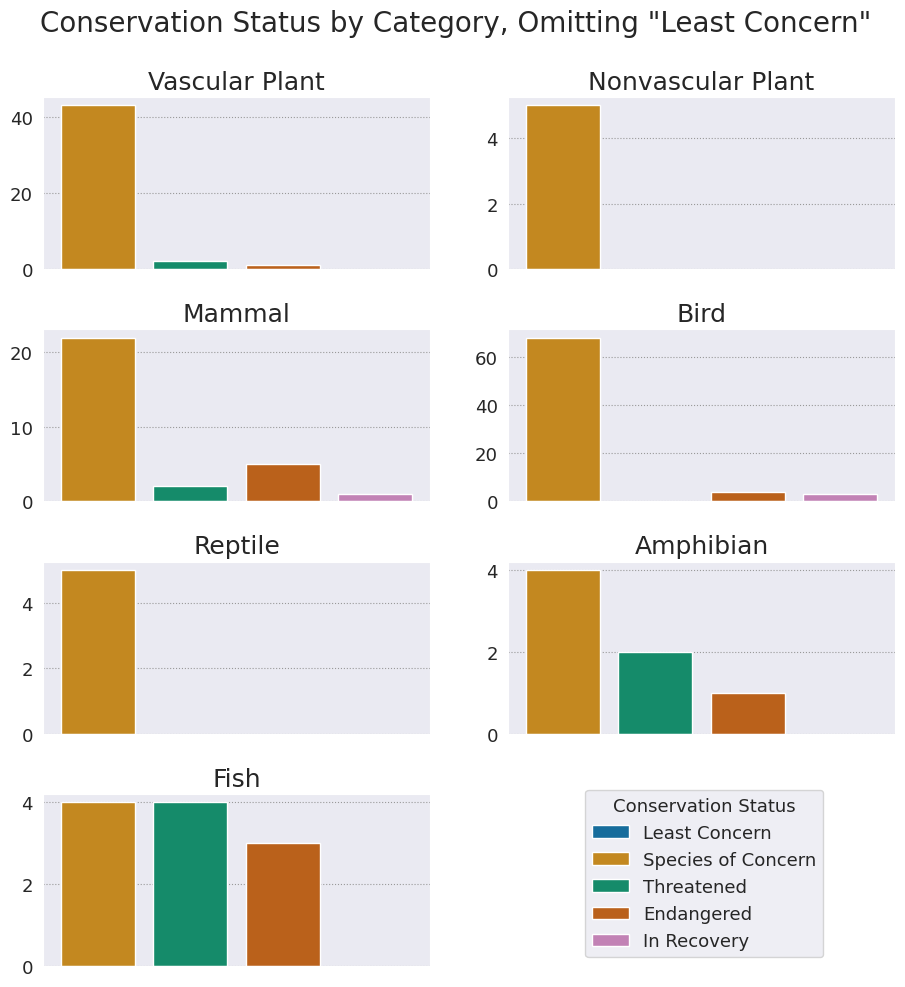

<Figure size 640x480 with 0 Axes>

In [22]:
# Repeat of previous graphs, but omitting 'Least Concern' conservation status
fig, axs = plt.subplots(4, 2, figsize=(11, 11))
fig.suptitle('Conservation Status by Category, Omitting "Least Concern"', fontsize=20)

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[(unique_species.category == 'Vascular Plant') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[0][0].set_title('Vascular Plant')
axs[0][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[(unique_species.category == 'Nonvascular Plant') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[0][1].set_title('Nonvascular Plant')
axs[0][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[(unique_species.category == 'Mammal') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[1][0].set_title('Mammal')
axs[1][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[(unique_species.category == 'Bird') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[1][1].set_title('Bird')
axs[1][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[(unique_species.category == 'Reptile') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[2][0].set_title('Reptile')
axs[2][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[(unique_species.category == 'Amphibian') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[2][1].set_title('Amphibian')
axs[2][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[(unique_species.category == 'Fish') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[3][0].set_title('Fish')
axs[3][0].set_xlim(0.4,4.6)

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[3][1].legend(loc=(0.2, 0.05), title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.35, top=0.9)
plt.show()
plt.clf()

# 

To finish off the analysis of how the species are distributed, let's plot the percent of species under a protected status in each category (found during the descriptive analysis above). As a reminder, a species is considered protected if its conservation status is "Species of Concern," "Threatened," "Endangered," or "In Recovery" (all but "Least Concern"). From this graph, we can see that mammals and birds are more likely to be protected, while plants (both vascular and nonvascular) are less likely to be protected.

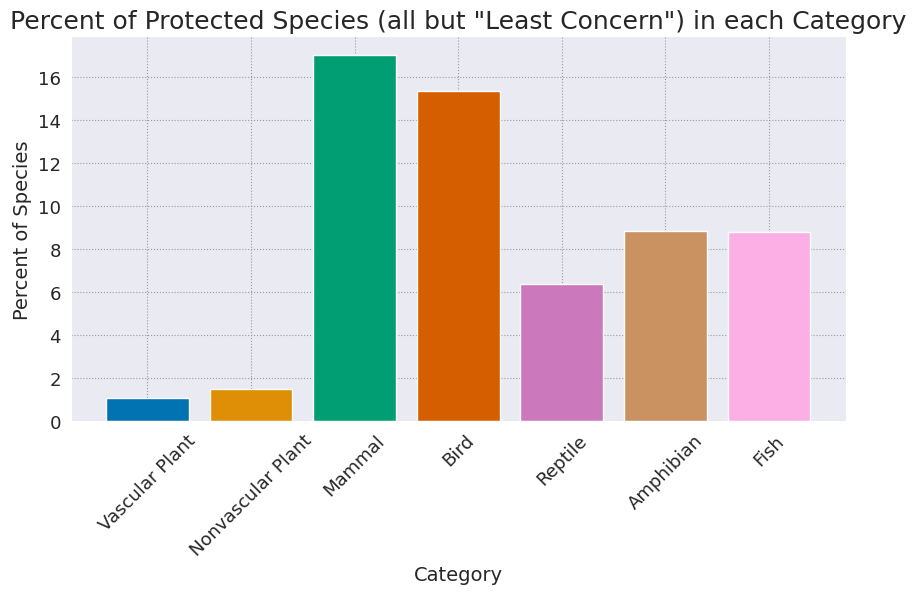

<Figure size 640x480 with 0 Axes>

In [23]:
# Bar graph of percent of protected species in each category:
fig, ax = plt.subplots(figsize=(10,5))
bar_labels = ['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']
plt.bar(x = range(len(protected_species)), height='protected_percent', data=protected_species, color=pal, tick_label=bar_labels)
plt.title('Percent of Protected Species (all but "Least Concern") in each Category')
plt.xlabel('Category')
plt.ylabel('Percent of Species')
plt.xticks(rotation=45, fontsize=13)
plt.show()
plt.clf()

# 

### Observation Distributions

Now, let's turn to visualizing how the observations are distributed. First, we will look at the distribution of observations in each park with a boxplot and a violin plot.

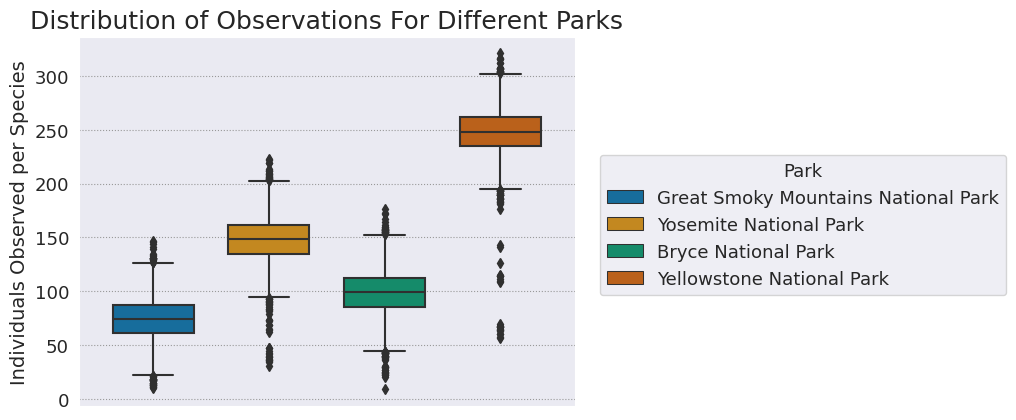

<Figure size 640x480 with 0 Axes>

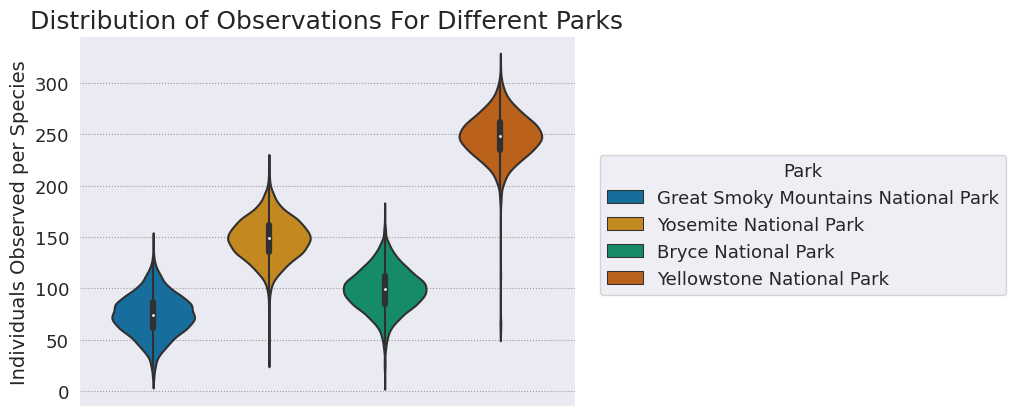

<Figure size 640x480 with 0 Axes>

In [24]:
# Boxplot of total number of observations in each park
fig, ax = plt.subplots()
sns.boxplot(data=df, x='park_name', y='observations', palette=pal, width=10, hue='park_name')
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,9)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
# ax.legend(title='Park', loc=(0.18, -0.37))
plt.show()
plt.clf()


# Violin plot of total number of observations in each park
fig, ax = plt.subplots()
sns.violinplot(data=df, x='park_name', y='observations', palette=pal, width=10, hue='park_name')
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,9)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
# ax.legend(title='Park', loc=(0.18, -0.37))
plt.show()
plt.clf()

# 

In the next two cells, we will look at the distribution of observations for different conservation statuses. The first cell is a boxplot and violin plot of the single-park observations for each conservation status. In other words, each species accounts for four points in these plots (one for each park). The second cell is a repeat of the first cell, but with the *total* observations for each species across all parks (so each species accounts for one point in these plots). 

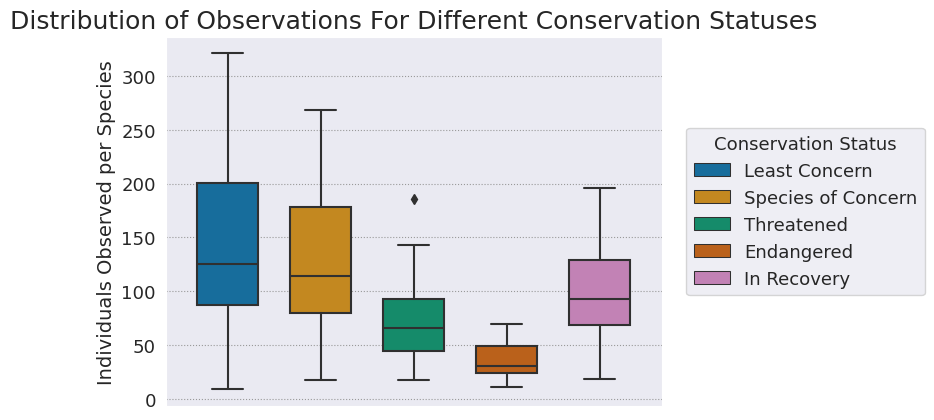

<Figure size 640x480 with 0 Axes>

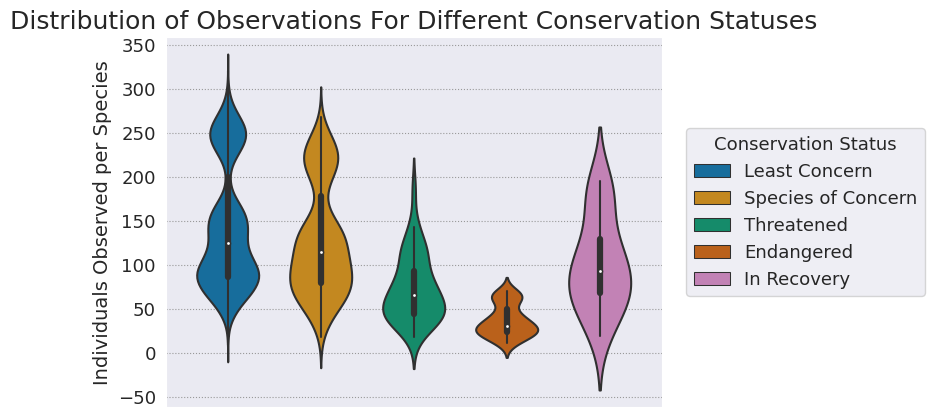

<Figure size 640x480 with 0 Axes>

In [25]:
# Boxplot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.boxplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()


# Violin plot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.violinplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

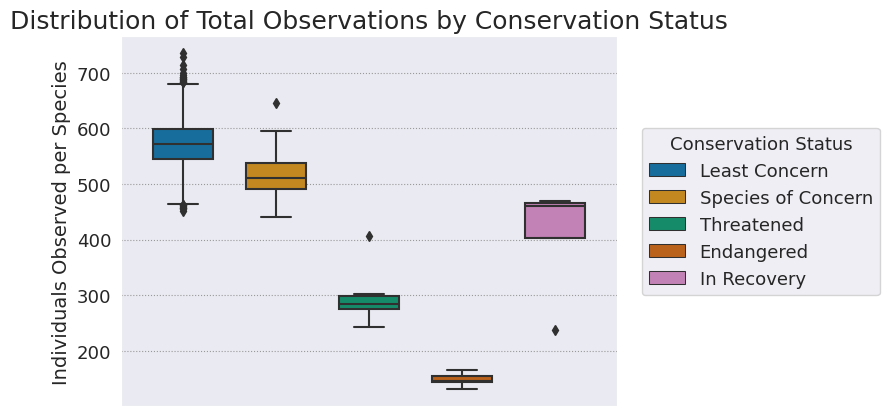

<Figure size 640x480 with 0 Axes>

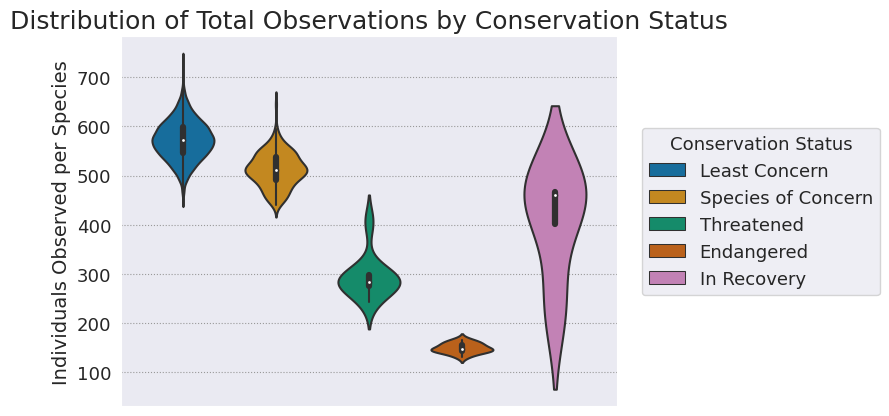

<Figure size 640x480 with 0 Axes>

In [26]:
# Repeat of previous graphs, but with the *total* observations across *all* parks
obs_all_parks = df.groupby(['scientific_name', 'category', 'conservation_status']).observations.sum().reset_index(name='total_obs')
obs_all_parks = obs_all_parks[-(obs_all_parks.total_obs == 0.0)].reset_index()

# Boxplot of the number of observations across all parks for each conservation status
fig, ax = plt.subplots()
sns.boxplot(data=obs_all_parks, x='conservation_status', y='total_obs', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Total Observations by Conservation Status')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Violin plot of the number of observations across all parks for each conservation status
fig, ax = plt.subplots()
sns.violinplot(data=obs_all_parks, x='conservation_status', y='total_obs', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=13)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Total Observations by Conservation Status')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# 

In the previous plots, we can clearly see that the number of observations decreases for species in greater danger of extinction (Least Concern &rarr; Species of Concern &rarr; Threatened &rarr; Endangered). Since the "In Recovery" status is made up of species which were previously endangered but have since experienced a comeback, species with this status have a larger number of observations than species with the "Endangered" status.


We can visualize this in another way using the average total observations per species calculated during the descriptive analysis phase. In the next cell, we plot the average total observations per species grouped by both category and by conservation status. Note that there is not much variation in the the average observations across different categories, but there is a clear variation across different conservation statuses. The error bars in these plots represent the standard deviation of the mean.

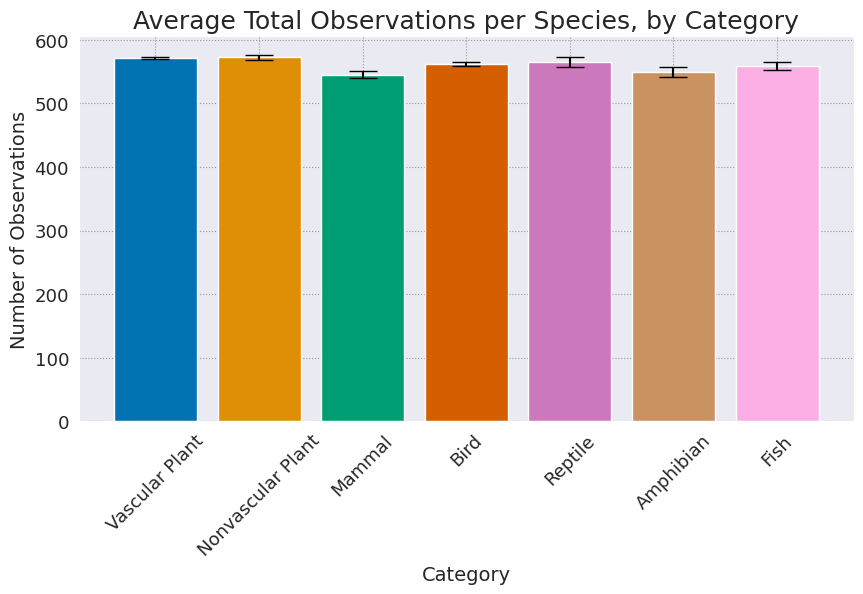

<Figure size 640x480 with 0 Axes>

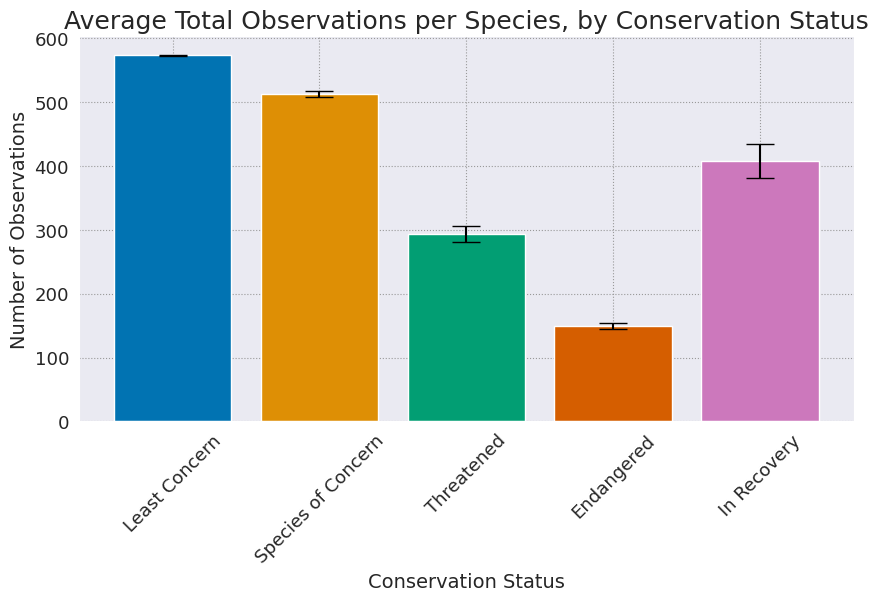

<Figure size 640x480 with 0 Axes>

In [27]:
# Bar graph of average total observations per species, grouped by category
fig, ax = plt.subplots(figsize=(10,5))
categories = ['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']
plt.bar(x=range(len(category_breakdown)), height='avg_obs_per_species', data=category_breakdown, tick_label=categories, color=pal, yerr='std_dev_of_mean', capsize=10)
plt.title('Average Total Observations per Species, by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, fontsize=13)
plt.show()
plt.clf()

# Bar graph of average total observations per species, grouped by conservation status
fig, ax = plt.subplots(figsize=(10,5))
conservation_statuses = ['Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
plt.bar(x=range(len(conservation_breakdown)), height='avg_obs_per_species', data=conservation_breakdown, tick_label=conservation_statuses, color=pal, yerr='std_dev_of_mean', capsize=10)
plt.title('Average Total Observations per Species, by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, fontsize=13)
plt.show()
plt.clf()


# 

It will be interesting to see if the park plays any role in the number of observations for different conservation statuses. The next two cells explore this relationship. In the first cell, we create a grouped boxplot and grouped violin plot of the observations in each park, grouped by conservation status. This is reversed in the second cell, plotting the observations for each conservation status, grouped by park. 

These plots repeat the trends we saw previously for how observations depend on conservation status and how observations depend on park. No major new trends are revealed in these plots, suggesting that park and conservation status are not strongly related. 

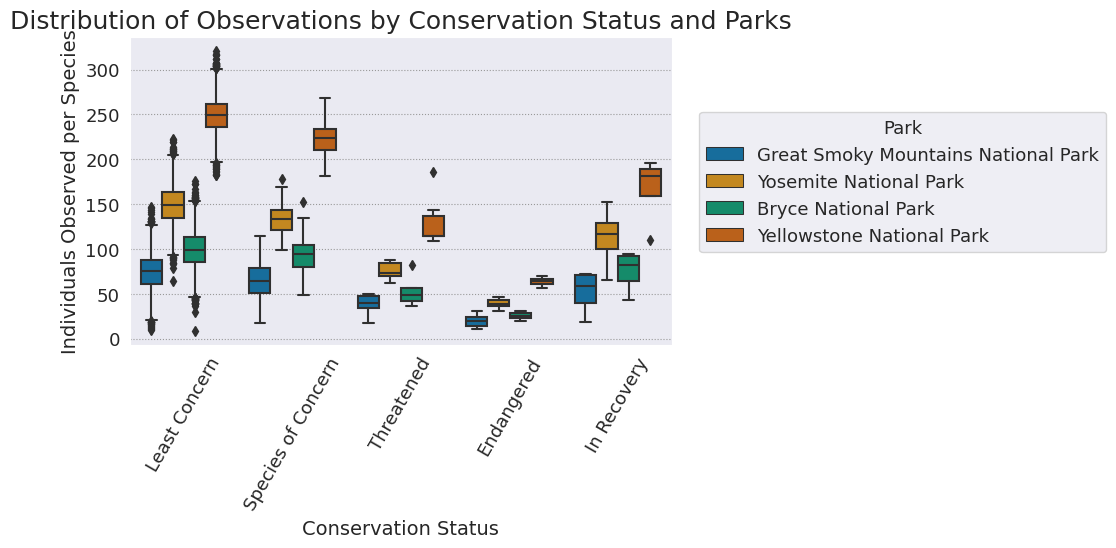

<Figure size 640x480 with 0 Axes>

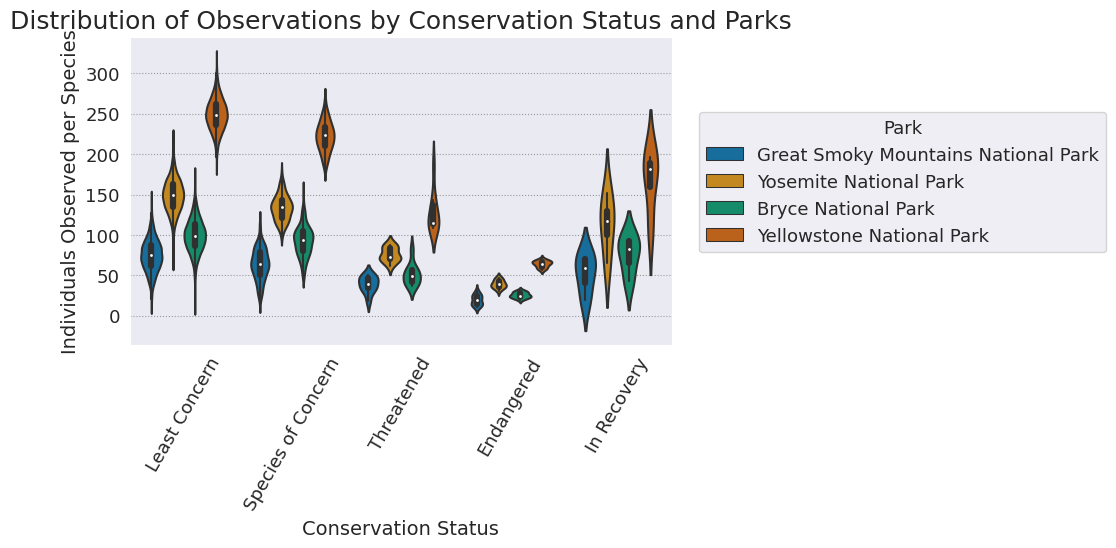

<Figure size 640x480 with 0 Axes>

In [28]:
# Grouped box plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=13)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.violinplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=13)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

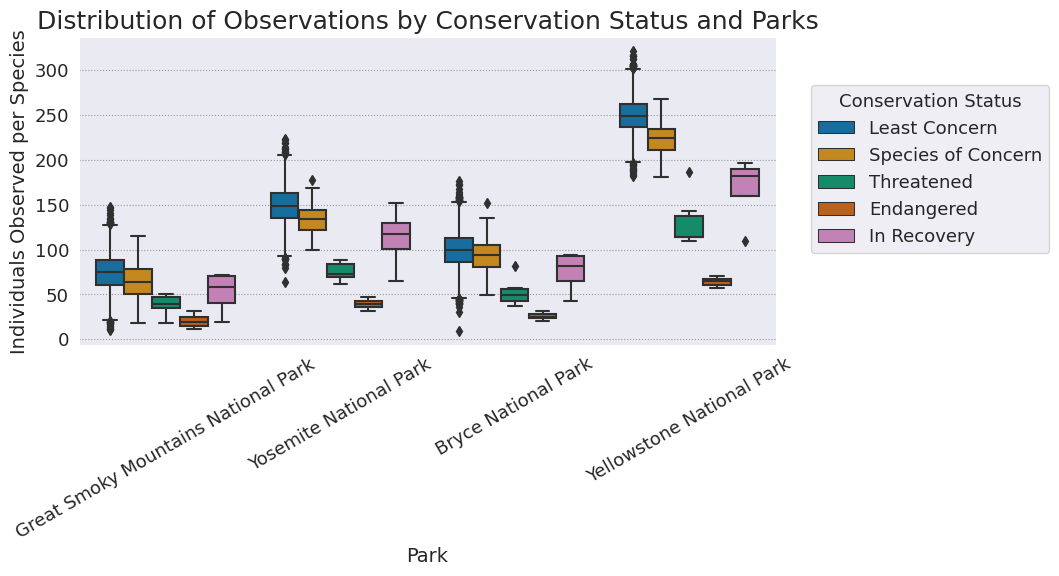

<Figure size 640x480 with 0 Axes>

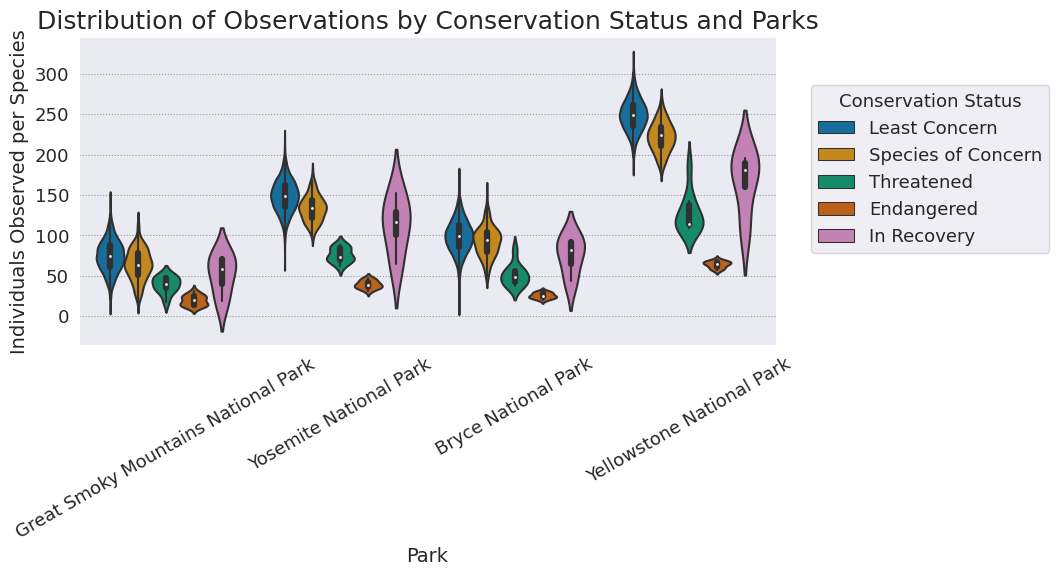

<Figure size 640x480 with 0 Axes>

In [29]:
# Grouped box plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal)
plt.xticks(rotation=30, fontsize=13)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.violinplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal, scale='width')
plt.xticks(rotation=30, fontsize=13)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# 
# 

Finally, let's look at histograms of the total observations for each species, grouped by conservation status:

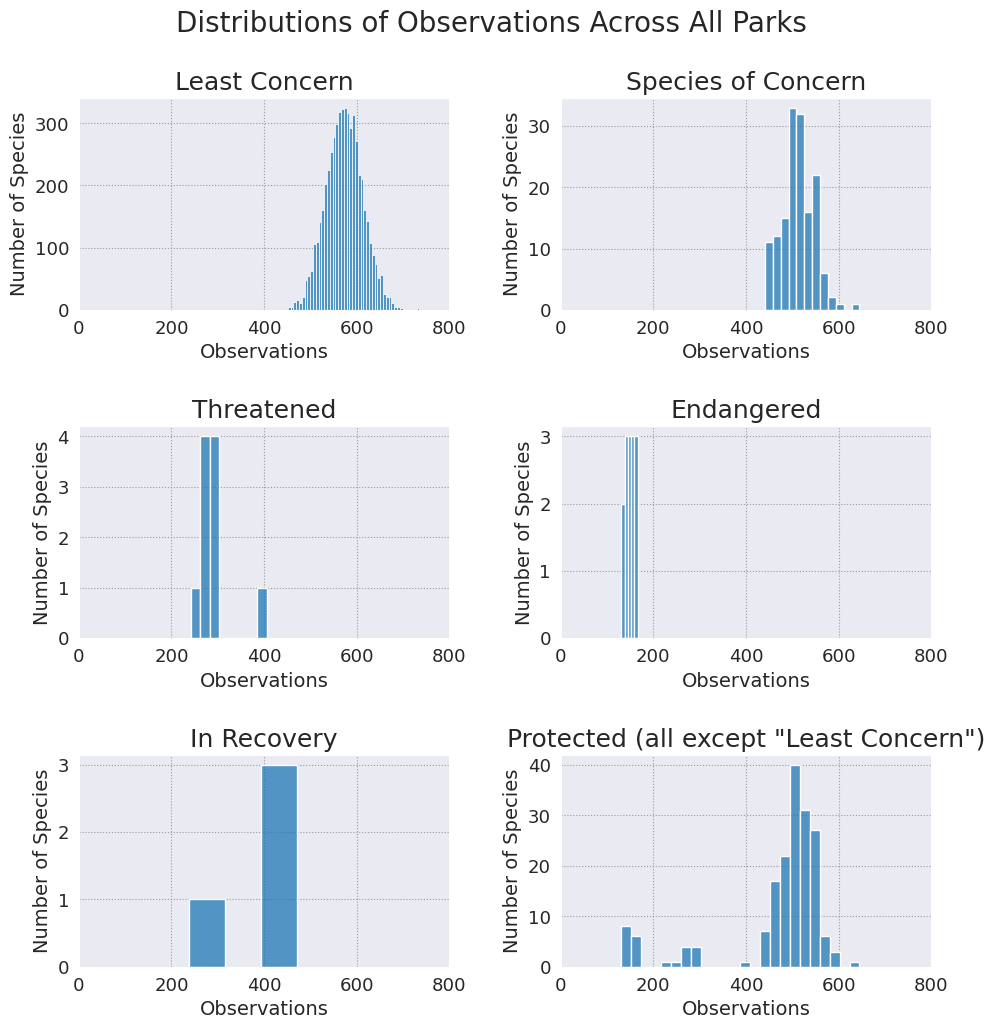

<Figure size 640x480 with 0 Axes>

In [30]:
# Histograms of total number of observations across parks (one histogram per conservation status)
total_observations = df.groupby('scientific_name').observations.sum().reset_index()
total_observations = pd.merge(total_observations, unique_species, how='left')

obs_range = [total_observations.observations.min(), total_observations.observations.max()]
#print(obs_range)
obs_range = [0, 800]

fig, axs = plt.subplots(3, 2, figsize=(11, 11))
fig.suptitle('Distributions of Observations Across All Parks', fontsize=20)

sns.histplot(ax=axs[0][0], x='observations', data=total_observations[total_observations.conservation_status == 'Least Concern'], palette=pal)
axs[0][0].set_title('Least Concern')
axs[0][0].set_xlabel('Observations')
axs[0][0].set_ylabel('Number of Species')
axs[0][0].set_xlim(obs_range)

sns.histplot(ax=axs[0][1], x='observations', data=total_observations[total_observations.conservation_status == 'Species of Concern'], palette=pal)
axs[0][1].set_title('Species of Concern')
axs[0][1].set_xlabel('Observations')
axs[0][1].set_ylabel('Number of Species')
axs[0][1].set_xlim(obs_range)

sns.histplot(ax=axs[1][0], x='observations', data=total_observations[total_observations.conservation_status == 'Threatened'], palette=pal)
axs[1][0].set_title('Threatened')
axs[1][0].set_xlabel('Observations')
axs[1][0].set_ylabel('Number of Species')
axs[1][0].set_xlim(obs_range)

sns.histplot(ax=axs[1][1], x='observations', data=total_observations[total_observations.conservation_status == 'Endangered'], palette=pal)
axs[1][1].set_title('Endangered')
axs[1][1].set_xlabel('Observations')
axs[1][1].set_ylabel('Number of Species')
axs[1][1].set_xlim(obs_range)

sns.histplot(ax=axs[2][0], x='observations', data=total_observations[total_observations.conservation_status == 'In Recovery'], palette=pal)
axs[2][0].set_title('In Recovery')
axs[2][0].set_xlabel('Observations')
axs[2][0].set_ylabel('Number of Species')
axs[2][0].set_xlim(obs_range)

sns.histplot(ax=axs[2][1], x='observations', data=total_observations[total_observations.conservation_status != 'Least Concern'], palette=pal)
axs[2][1].set_title('Protected (all except "Least Concern")')
axs[2][1].set_xlabel('Observations')
axs[2][1].set_ylabel('Number of Species')
axs[2][1].set_xlim(obs_range)

plt.subplots_adjust(wspace=0.3, hspace=0.55, top=0.9)
plt.show()
plt.clf()

# 

In these graphs, we can clearly see the decrease in observations for species of increasing risk of extinction. Additionally, the histogram for the "Least Concern" status looks to be normally distributed. Since this is the conservation status with the largest number of species, we get a very clear Gaussian shape to this histogram. For the other conservation statuses, the smaller number of species makes it harder to tell if the data is normally distributed or not. The final graph above is a combination of all the species under protected status.

We can use these graphs as a check on our earlier decisions about the ambiguous conservation status of the gray wolf and the rainbow trout. In the initial dataset, the gray wolf was listed twice, once as "Endangered" and once as "In Recovery." Similarly, the rainbow trout was listed as both "Least Concern" and "Threatened." We decided to classify the gray wolf as "In Recovery," and the rainbow trout as "Threatened." 

To check if these decisions were accurate, look at the total observations for these two species, and see where they fall in the histograms above:

In [31]:
# Print out the total observations for the gray wolf and the rainbow trout
display(total_observations[(total_observations.scientific_name == 'Oncorhynchus mykiss') | (total_observations.scientific_name == 'Canis lupus')])
wolf_observations = total_observations.loc[804, 'observations']
trout_observations = total_observations.loc[3430, 'observations']
print('The gray wolf had', wolf_observations, 'total observations.')
print('The rainbow trout had', trout_observations, 'total observations.')

,scientific_name,observations,category,conservation_status
804,Canis lupus,237,Mammal,In Recovery
3430,Oncorhynchus mykiss,406,Fish,Threatened


The gray wolf had 237 total observations.
The rainbow trout had 406 total observations.


For the gray wolf, 237 observations is a bit on the low side for the "In Recovery" status, but on the high side for the "Endangered" status. Given the history of the increase in wolf populations since the Endangered Species Act of 1973, "In Recovery" still seems to be the more appropriate choice.

For the rainbow trout, 406 observations is on the high side for the "Threatened" status, but on the low side for the "Least Concern" status. Given the fact that some federal/state agencies classify the rainbow trout as endangered or threatened, our choice to err on the side of caution and list the rainbow trout as "Threatened" still seems to be the more appropriate choice.

# 
# 

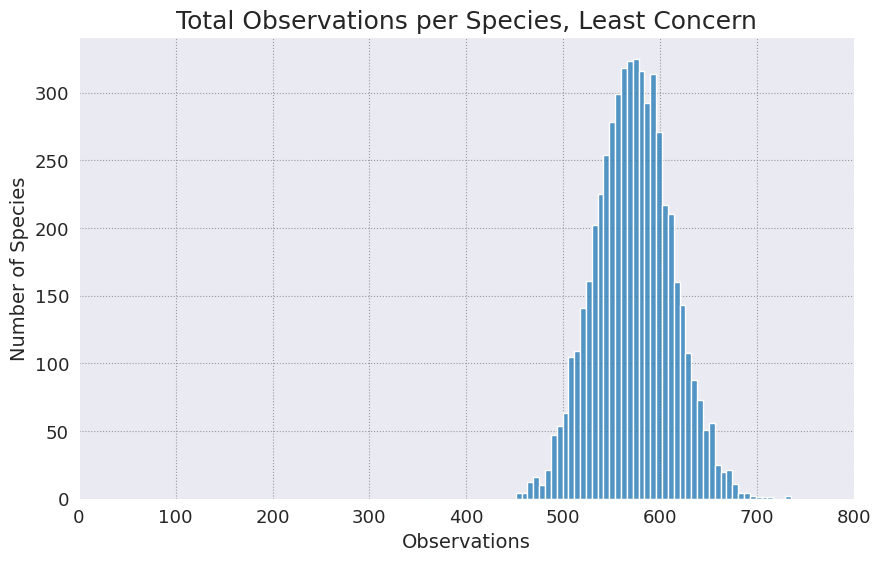

<Figure size 640x480 with 0 Axes>

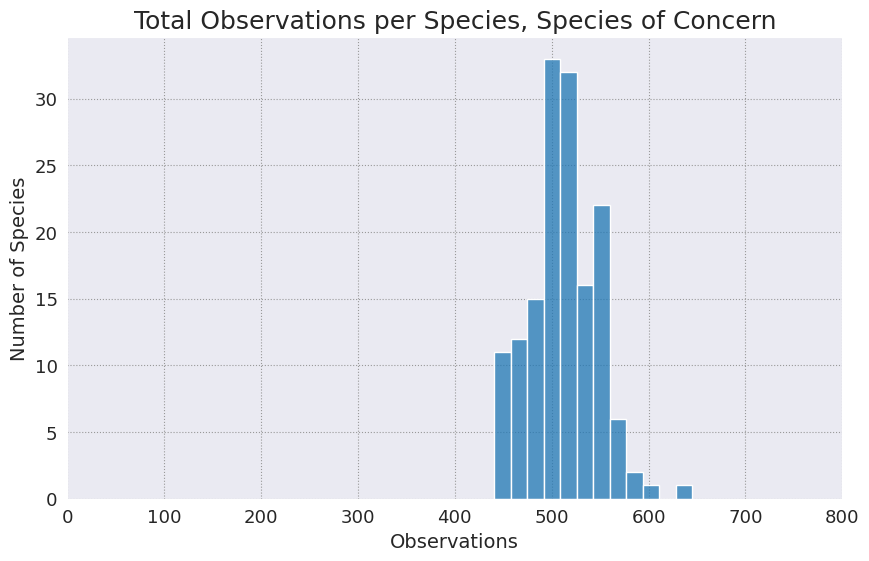

<Figure size 640x480 with 0 Axes>

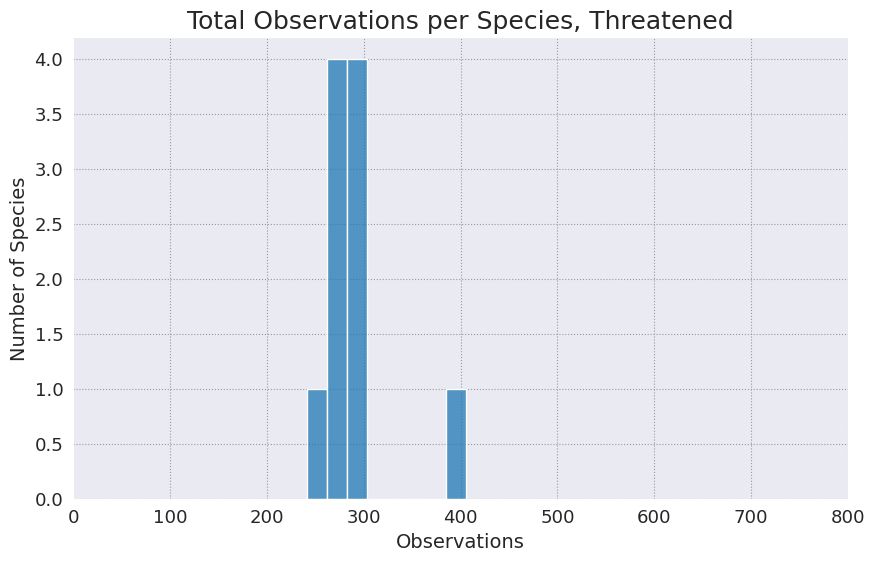

<Figure size 640x480 with 0 Axes>

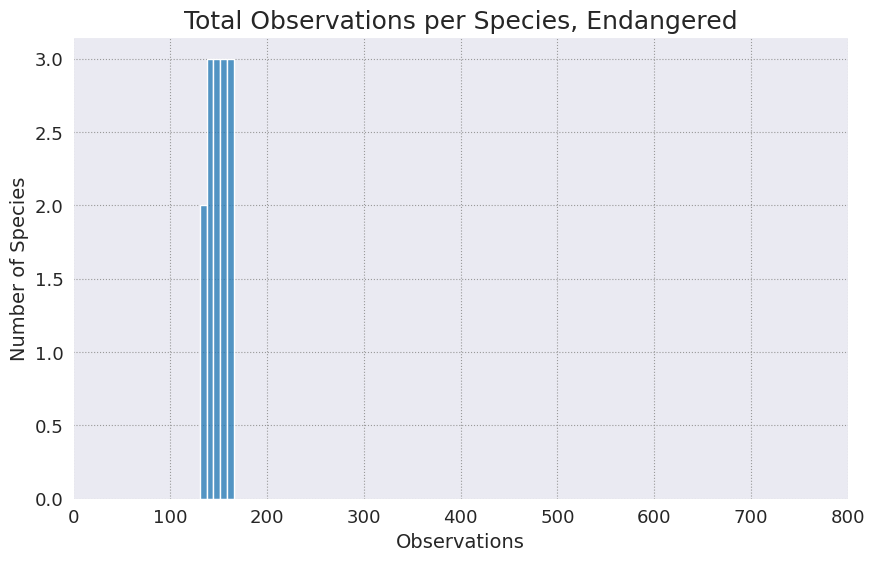

<Figure size 640x480 with 0 Axes>

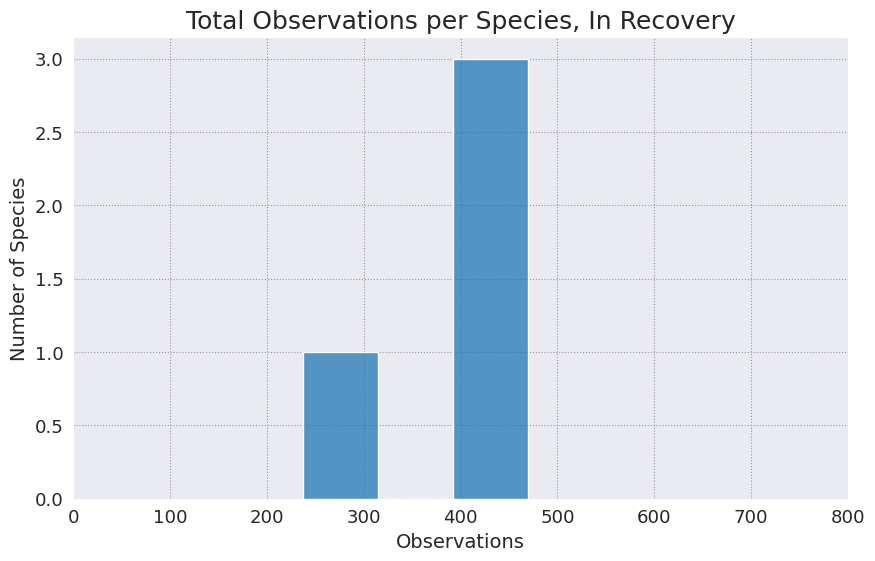

<Figure size 640x480 with 0 Axes>

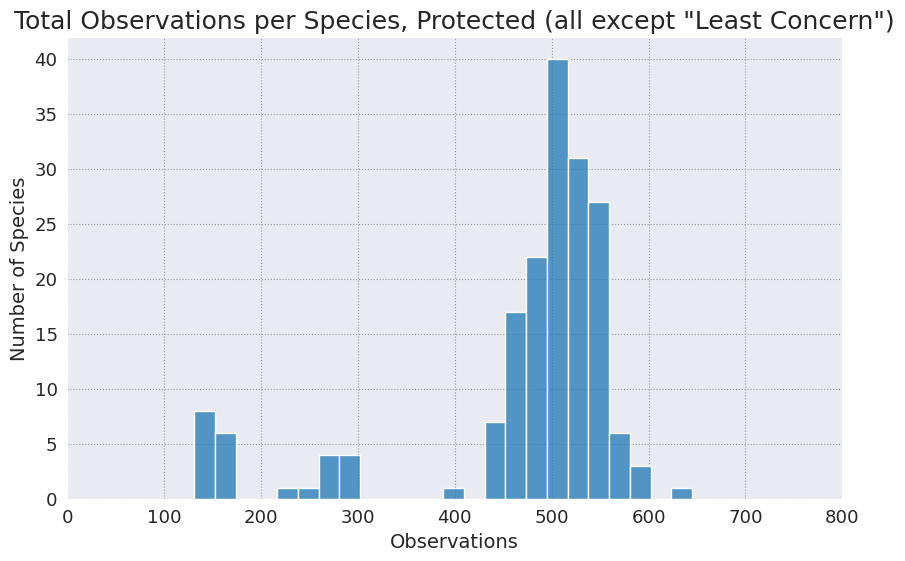

<Figure size 640x480 with 0 Axes>

In [32]:
# The code below produces individual graphs for the histogram array above

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status == 'Least Concern'], palette=pal)
ax.set_title('Total Observations per Species, Least Concern')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status == 'Species of Concern'], palette=pal)
ax.set_title('Total Observations per Species, Species of Concern')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status == 'Threatened'], palette=pal)
ax.set_title('Total Observations per Species, Threatened')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status == 'Endangered'], palette=pal)
ax.set_title('Total Observations per Species, Endangered')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status == 'In Recovery'], palette=pal)
ax.set_title('Total Observations per Species, In Recovery')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, x='observations', data=total_observations[total_observations.conservation_status != 'Least Concern'], palette=pal)
ax.set_title('Total Observations per Species, Protected (all except "Least Concern")')
ax.set_xlabel('Observations')
ax.set_ylabel('Number of Species')
ax.set_xlim(obs_range)
plt.show()
plt.clf()

## 
## 


## Conclusions
This dataset includes observations for 5541 different species across 4 national parks. Each species belongs to one of 7 categories, and is assigned one of 5 conservation statuses. Vascular plants make up the vast majority of the species (77.23%). Most species (96.77%) are classified as "Least Concerned" for their conservation status.

The total number of observations varied by park: Great Smoky Mountains had 13.03% of the total observations, Bryce had 17.38%, Yosemite had 26.05%, and Yellowstone had 43.55%.

There were an average of 569.2 observations per species across all four parks. This was fairly uniform across species categories, ranging from 545.0 to 572.5. However, the average observations per species varied significantly across conservation statuses: for "Least Concern", the average was 572.5, but for increasing degrees of concern (from "Species of Concern" to "Threatened" to "Endangered"), the average drops dramatically (512.5, 293.2, and 148.8, respectively). For species "In Recovery," the average observations per species increases to 407.2. From these results, it seems that the conservation status levels are meaningful, and accurately assigned.

The fraction of species under some sort of protected status ("Species of Concern," "Threatened," "Endangered," or "In Recovery") varies across species category. Plants have the lowest percent (1.08% for vascular plants, 1.50% for nonvascular plants). Reptiles, amphibians, and fish are more likely to be protected (6.41%, 8.86%, and 8.80%, respectively). The highest rates of protection are for mammals (17.05%) and birds (15.37%). The cause of this wide variation is unclear from the data at hand.

## Future Work
There are several ways that this study could be expanded to gain additional insight. First, the number of parks can be increased, allowing for a wider range of habitats for species. It is likely that each species will be better suited to live in some parks, and less suited to live in other parks, so including more parks will help give us a clearer picture of the overall population size for each species. 

It would also be interesting to collect this data over a wider range of time. If we can track the weekly observation counts over a whole year or more, we can determine if there is a seasonal variation to the observations. Additionally, we can keep an eye on the long-term trends for each species. This is especially important for species under a protected status, since it can alert us to a species that is experiencing a rapid decline in population. It can also help make a decision as to whether any endangered species are making a comeback, and should be moved to the "In Recovery" status.

Finally, we can explore why there was a substantial variation in the number of observations for each park. Without knowing more about how the data was produced, it is difficult to draw any conclusions as to why this variation exists. For example, there could have been more park rangers making observations at Yellowstone than at the other parks, or the rangers at Yellowstone could have been observing for a larger fraction of the day or over a larger area of land. On the other hand, the difference could be more significant, and related to the health of wildlife populations in the parks.